#Self Organizing Map

##Install MiniSom Package

In [138]:
!pip install MiniSom

### Importing the libraries


In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [140]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
# Austrailian Credit Approval Data set
# all attributes names have been put as meaningless symbols
# so we have to use SOM to extract features
# to get insights and segment customers

# the frauds would be the outliers in dataset, therefore they will be the 
# outlier neurons that will be distant from other neurons from its neighborhood

x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1]

## Feature Scaling


In [141]:
from sklearn.preprocessing import MinMaxScaler
# NNs not effected by the distribution of the data
# so normal scaling is used
sc = MinMaxScaler(feature_range = (0, 1))
x = sc.fit_transform(x)

##Training the SOM


In [142]:
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len=15, sigma=1.0, learning_rate= 0.5)
# initialize the weights
som.random_weights_init(x)
som.train_random(data=x, num_iteration=100) #100 epochs

##Visualizing the results


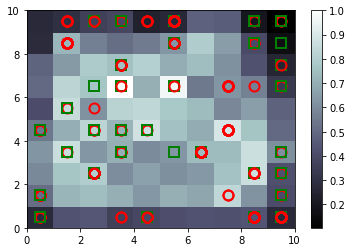

In [143]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
# display mean distances for all the units by color 
# (further they are, the brigther they get)
# takes the transpose of the matrix
pcolor(som.distance_map().T)
colorbar()
# therefore the custsomers that are close to the brightest 
# nodes are most likely to commit fraud

# highlight the most suspicious customers who got approval
markers = ['o', 's']
colors = ['r', 'g']

for i, row in enumerate(x):
  w = som.winner(row)
  plot(w[0] + 0.5, 
       w[1] + 0.5,
       markers[y[i]],
       markeredgecolor= colors[y[i]],
       markerfacecolor = 'None',
       markersize = 10,
       markeredgewidth = 2)
show()

## Finding the frauds


In [145]:
# get list of all co-ordinate for winning nodes
mappings = som.win_map(x)
# coordinates of outliar nodes (3,6) and (5,6)
frauds = np.concatenate( (mappings[(3,6)], mappings[(5,6)]))
frauds = sc.inverse_transform(frauds)

##Printing the Fraud Client IDs

In [146]:
print(frauds[:, 0])

[15699963. 15667934. 15789611. 15668679. 15738487. 15773421. 15682686.
 15781875. 15809837. 15636521. 15761554. 15707602. 15811690. 15815095.
 15720725. 15672912. 15694677. 15759387. 15712483. 15698522.]
